In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt


In [181]:
train = pd.read_csv('C:\\Users\\user\\workspace\\movie\\movies_train.csv')
test = pd.read_csv('C:\\Users\\user\\workspace\\movie\movies_test.csv')
submission = pd.read_csv('C:\\Users\\user\\workspace\\movie\\submission.csv')

EDA 및 전처리

In [182]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [184]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [185]:
#df = train[['title', 'distributor', 'genre', 'release_time', 'screening_rat', 'director']]

In [186]:
#one_hot = pd.get_dummies(df)

In [187]:
train = train.drop(['genre'],axis= 1)
test = test.drop(['genre'],axis= 1)
train = train.drop(['release_time'],axis= 1)
test = test.drop(['release_time'],axis= 1)
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)
train = train.drop(['distributor'],axis= 1)
test = test.drop(['distributor'],axis= 1)
train = train.drop(['dir_prev_bfnum'],axis= 1)
test = test.drop(['dir_prev_bfnum'],axis= 1)
train = train.drop(['director'],axis= 1)
test = test.drop(['director'],axis= 1)
train = train.drop(['num_actor'],axis= 1)
test = test.drop(['num_actor'],axis= 1)
train = train.drop(['screening_rat'],axis= 1)
test = test.drop(['screening_rat'],axis= 1)
train = train.drop(['dir_prev_num'],axis= 1)
test = test.drop(['dir_prev_num'],axis= 1)

In [188]:
train.describe()

,time,num_staff,box_off_num
count,600.000000,600.000000,6.000000e+02
mean,100.863333,151.118333,7.081818e+05
std,18.097528,165.654671,1.828006e+06
min,45.000000,0.000000,1.000000e+00
25%,89.000000,17.000000,1.297250e+03
50%,100.000000,82.500000,1.259100e+04
75%,114.000000,264.000000,4.798868e+05
max,180.000000,869.000000,1.426277e+07


In [189]:
#train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num') #장르별 평균 관객수

In [190]:
pd.reset_option('display.float.format')

In [191]:
train.corr()

,time,num_staff,box_off_num
time,1.000000,0.623205,0.441452
num_staff,0.623205,1.000000,0.544265
box_off_num,0.441452,0.544265,1.000000


<AxesSubplot:>

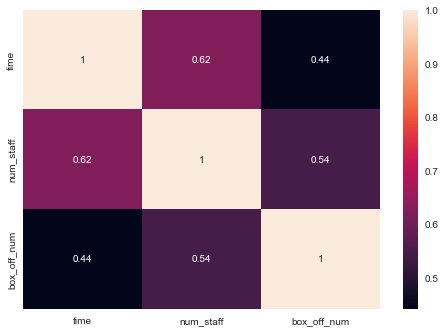

In [192]:
plt.style.use('seaborn')
sns.heatmap(train.corr(), annot=True)

In [193]:
train.isna().sum() / 600

time           0.0
num_staff      0.0
box_off_num    0.0
dtype: float64

In [194]:
test.isna().sum() / 600

time         0.0
num_staff    0.0
dtype: float64

In [195]:
train

,time,num_staff,box_off_num
0,96,91,23398
1,130,387,7072501
2,123,343,6959083
3,101,20,217866
4,108,251,483387
...,...,...,...
595,111,510,1475091
596,127,286,1716438
597,99,123,2475
598,102,431,2192525


In [196]:
#train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

In [197]:
#train['dir_prev_bfnum'].fillna(0, inplace=True)

In [198]:
train

,time,num_staff,box_off_num
0,96,91,23398
1,130,387,7072501
2,123,343,6959083
3,101,20,217866
4,108,251,483387
...,...,...,...
595,111,510,1475091
596,127,286,1716438
597,99,123,2475
598,102,431,2192525


In [199]:
test.isna().sum()

time         0
num_staff    0
dtype: int64

In [200]:
#train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

In [201]:
#test['dir_prev_bfnum'].fillna(0, inplace=True)

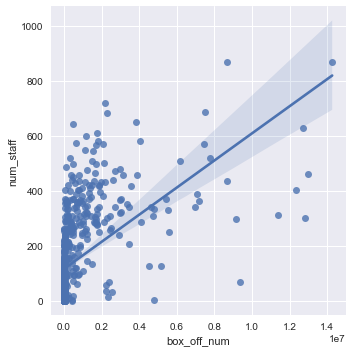

In [202]:
sns.lmplot(data=train, x='box_off_num', y='num_staff')

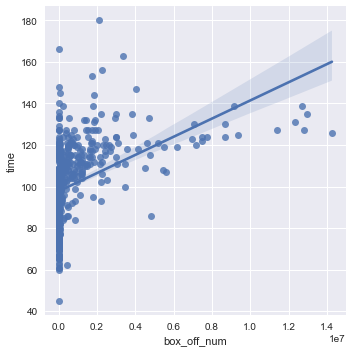

In [203]:
sns.lmplot(data=train, x="box_off_num", y="time")

모델링

singleLGBM

In [204]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [205]:
features = ['time', 'num_staff']
target = ['box_off_num']

In [206]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [207]:
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [208]:
singleLGBM = submission.copy()

In [209]:
singleLGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [210]:
singleLGBM['box_off_num'] = model.predict(X_test)

In [211]:
singleLGBM.to_csv('singleLGBM', index = False)

KFold

In [212]:
from sklearn.model_selection import KFold

In [213]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=777)

In [214]:
for train_idx, val_idx in k_fold.split(X_train):
    print(len(train_idx), len(val_idx))
    break

480 120


In [215]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.88521e+12
[100]	valid_0's l2: 4.01909e+12
[100]	valid_0's l2: 2.9793e+12
[100]	valid_0's l2: 1.7188e+12
[100]	valid_0's l2: 1.67975e+12


In [216]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [217]:
kfoldLightGBM = submission.copy()

In [218]:
kfoldLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [219]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3.238537e+06
1,아빠가 여자를 좋아해,9.657627e+05
2,하모니,1.004832e+06
3,의형제,1.384672e+06
4,평행 이론,8.962683e+05


라쏘, 릿지

In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   time         600 non-null    int64
 1   num_staff    600 non-null    int64
 2   box_off_num  600 non-null    int64
dtypes: int64(3)
memory usage: 14.2 KB


In [221]:
train.shape

(600, 3)

In [222]:
polynomial_transformer = PolynomialFeatures(1)
polynomial_features = polynomial_transformer.fit_transform(train.values)

In [223]:
X = pd.DataFrame(polynomial_features) #다항변수 입력

In [224]:
y = train[['box_off_num']] #목표변수 정의

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [226]:
model = Lasso(alpha=0.001, max_iter=1000, normalize=True) 
model.fit(X_train, y_train)

Lasso(alpha=0.001, normalize=True)

In [227]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [228]:
mse = mean_squared_error(y_train, y_train_predict)

print("training set에서의 성능")
print("-----------------------")
print(sqrt(mse))

mse = mean_squared_error(y_test, y_test_predict)

print("test set에서의 성능")
print("-----------------------")
print(sqrt(mse))

training set에서의 성능
-----------------------
35.51049898462281
test set에서의 성능
-----------------------
36.39460057315035


그리드서치

In [229]:
 from sklearn.model_selection import GridSearchCV

In [230]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

params = {
    'learning_rate': [0.1, 0.01, 0.003],
    'min_child_samples': [20, 30]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  cv = k_fold)

In [231]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [232]:
gs.best_params_

{'learning_rate': 0.01, 'min_child_samples': 20}

In [233]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000, learning_rate=0.003, min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.14622e+12
[200]	valid_0's l2: 1.55766e+12
[300]	valid_0's l2: 1.27182e+12
[400]	valid_0's l2: 1.13254e+12
[500]	valid_0's l2: 1.05288e+12
[600]	valid_0's l2: 1.01391e+12
[700]	valid_0's l2: 9.98005e+11
[800]	valid_0's l2: 9.94363e+11
[900]	valid_0's l2: 9.95584e+11
[100]	valid_0's l2: 5.09877e+12
[200]	valid_0's l2: 4.17947e+12
[300]	valid_0's l2: 3.5893e+12
[400]	valid_0's l2: 3.20327e+12
[500]	valid_0's l2: 2.95184e+12
[600]	valid_0's l2: 2.76788e+12
[700]	valid_0's l2: 2.63026e+12
[800]	valid_0's l2: 2.52645e+12
[900]	valid_0's l2: 2.44694e+12
[1000]	valid_0's l2: 2.38511e+12
[100]	valid_0's l2: 3.77379e+12
[200]	valid_0's l2: 2.8508e+12
[300]	valid_0's l2: 2.31568e+12
[400]	valid_0's l2: 1.99687e+12
[500]	valid_0's l2: 1.80047e+12
[600]	valid_0's l2: 1.6631e+12
[700]	valid_0's l2: 1.56434e+12
[800]	valid_0's l2: 1.48802e+12
[900]	valid_0's l2: 1.42259e+12
[1000]	valid_0's l2: 1.37946e+12
[100]	valid_0's l2: 6.27493e+11
[200]	valid_0's l2: 3.2662e+11
[300]	vali

In [234]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [235]:
gs.best_params_

{'learning_rate': 0.01, 'min_child_samples': 20}

In [236]:
gslgbm = submission.copy()

In [237]:
gslgbm.to_csv('gslgbm.csv', index = False)

In [238]:
from dacon_submit_api import dacon_submit_api 

result = dacon_submit_api.post_submission_file(
'gslgbm.csv', 
'4802a80f0175b68b06c46c379deb3c0c6b28ff5b57bf947b9e1221903f4e3540', 
'235536', 
'rgm', 
'LGBMRegressor' )

{'isSubmitted': True, 'detail': 'Success'}
